# HW-02：Stata 基础命令练习
- 姓名：倪璐
- 学号： 23327059
- 作业简介：Stata 基础命令练习，熟悉 Stata 的基础操作

## 调入数据sysuse nlsw88.dta, clear

In [4]:
sysuse nlsw88.dta, clear

(NLSW, 1988 extract)


## 1. 统计如下变量的平均值、标准差、中位数、最小值和最大值，并列表呈现出来，并输出为 Excel 或 Word 文档，名称为 Table01.xlsx 或 Table01.docx： age grade wage hours ttl_exp tenure
Tips: 可以输入 lianxh 结果输出 表1 或自行定义关键词查询相关推文。

In [5]:
* 简洁版本 - 直接导出描述性统计
estpost summarize age grade wage hours ttl_exp tenure, detail
esttab using "Table01.xlsx", ///
    cells("mean sd min max count") ///
    noobs ///
    replace


             |  e(count)   e(sum_w)    e(mean)     e(Var)      e(sd) 
-------------+-------------------------------------------------------
         age |      2246       2246   39.15316   9.363614   3.060002 
       grade |      2244       2244   13.09893   6.356682   2.521246 
        wage |      2246       2246   7.766949   33.12604   5.755523 
       hours |      2242       2242   37.21811   110.4419   10.50914 
     ttl_exp |      2246       2246   12.53498   21.25401   4.610208 
      tenure |      2231       2231    5.97785   30.36375   5.510331 

             | e(skewn~)  e(kurto~)     e(sum)     e(min)     e(max) 
-------------+-------------------------------------------------------
         age |  .2003234   1.932389      87938         34         46 
       grade |  .0469717   3.615168      29394          0         18 
        wage |  3.096199   15.85446   17444.57   1.004952   40.74659 
       hours | -.7336644   4.925176      83443          1         80 
     ttl_exp | -.2

## 2．产生如下变量：
- age2 : 该变量的所有观察值等于 age 变量中相应观察值的平方
- ln_wage = ln(wage)  : 工资变量的自然对数
- wage_hour = wage/hours : 工资变量 wage 与小时 hours 的比值
- dum : 该变量是一个虚拟变量（dummy variable），其取值为：
    - dum = 1 如果某个妇女的 wage 大于所有妇女的平均工资
    - dum = 0 如果某个妇女的 wage 小于或等于所有妇女的平均工资

In [21]:
* 生成 age 的平方
gen age2 = age^2

* 生成工资的自然对数
gen ln_wage = ln(wage)

* 生成 wage 与 hours 的比值
gen wage_hour = wage/hours

* 生成虚拟变量 dum
egen mean_wage = mean(wage)
gen dum = (wage > mean_wage)

(4 missing values generated)


## 3．绘图。
- 绘制 ttl_exp 变量的直方图和密度函数图，分别保存/输出 (提示：可使用 graph export 命令) 为 His_ttl.png 和 Kendi_ttl.png，并作简单解释。
- 使用 mkdensity 命令绘制 industry 变量取值为 1,3,5,6,7,11 时，$\ln(wage)$ 变量的密度函数图，并做简要介绍。提示：你可以使用 des2 命令或 label list indlbl。

(bin=33, start=.11538462, width=.87179486)
file His_ttl.png written in PNG format


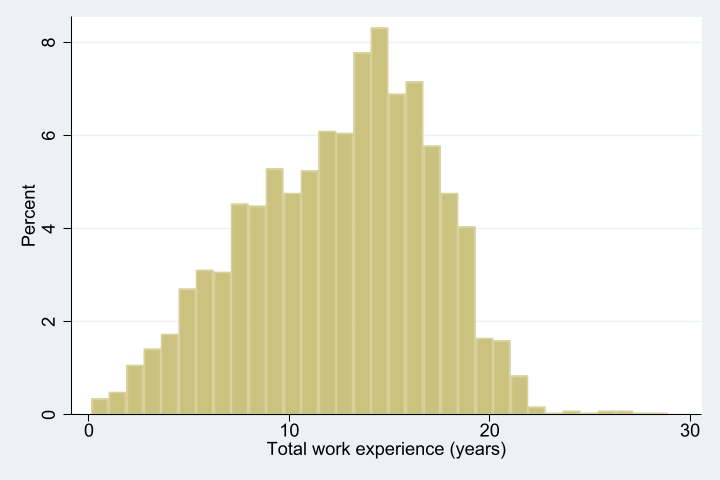

In [22]:
* 绘制 ttl_exp 变量的直方图并导出为 His_ttl.png
histogram ttl_exp, percent
graph export His_ttl.png, replace

- 简单解释：该直方图显示总工作年限（ttl_exp）的分布呈右偏，大部分员工的工作经验集中在较低年限（约 0–10 年），少数员工有较长的工作经验（最长达约 30 年）。

file Kendi_ttl.png written in PNG format


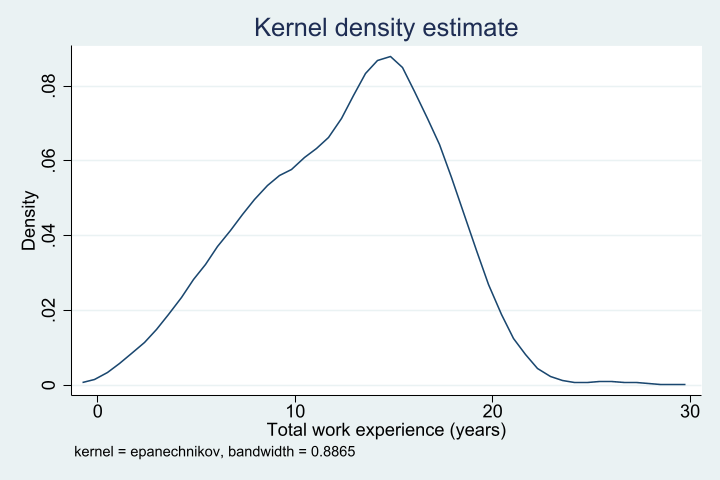

In [23]:
* 绘制 ttl_exp 变量的密度函数图并导出为 Kendi_ttl.png
kdensity ttl_exp
graph export Kendi_ttl.png, replace

- 简单解释：该密度函数图同样显示总工作年限呈右偏分布，峰值出现在约5年处，表明大多数员工的工作经验较少，随着年限增加，员工比例逐渐下降。

(761 observations deleted)


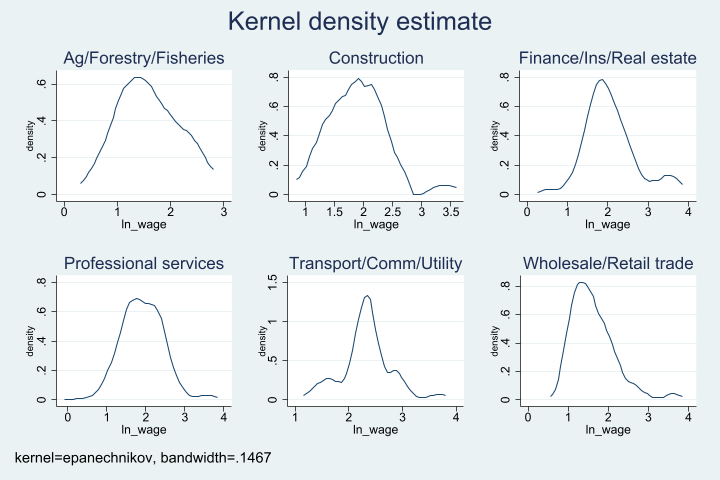

In [24]:
* 仅保留 industry 为 1, 3, 5, 6, 7, 11 的观测
keep if inlist(industry, 1, 3, 5, 6, 7, 11)

* 绘制 ln_wage 的密度函数图，按 industry 分组
mkdensity ln_wage, by(industry)

## 4. industry 变量表示妇女所在的行业，请做如下统计：
(1) 每个行业的观察值个数；
(2) 各个行业妇女的平均工资(wage)、平均工作时数(hours)、平均年龄(age)；
(3) 列表统计不同行业中白种人、黑种人和其他人种的比例
Tips：可以使用 tabulue, panels, egen, fre, fsum 等命令。

In [26]:
* (1) 每个行业的观察值个数
tabulate industry

* (2) 各行业平均工资、平均工作时数、平均年龄
tabstat wage hours age, by(industry) statistics(mean)

* (3) 不同行业中白种人、黑种人和其他人种的比例
tabulate industry race, row


               Industry |      Freq.     Percent        Cum.
------------------------+-----------------------------------
  Ag/Forestry/Fisheries |         17        1.14        1.14
           Construction |         29        1.95        3.10
 Transport/Comm/Utility |         90        6.06        9.16
 Wholesale/Retail trade |        333       22.42       31.58
Finance/Ins/Real estate |        192       12.93       44.51
  Professional services |        824       55.49      100.00
------------------------+-----------------------------------
                  Total |      1,485      100.00

Summary statistics: Mean
Group variable: industry (Industry)

        industry |      wage     hours       age
-----------------+------------------------------
Ag/Forestry/Fish |  5.621121  34.47059  39.94118
    Construction |  7.564934  35.65517  38.62069
Transport/Comm/U |  11.44335  39.85556  39.27778
Wholesale/Retail |  6.125897  35.24699  39.28829
Finance/Ins/Real |  9.843174  38.51563  38.8

## 5．请使用 label define 和 label value 命令，把 race 变量中的数值做如下定义：
1 —— “白种人”
2 —— “黑种人”
3 —— “其它”

In [ ]:
sysuse "nlsw88.dta", clear

* 定义 race 变量的标签
label define racelbl 1 "白种人" 2 "黑种人" 3 "其它"

* 将标签赋给 race 变量
label value race racelbl

Exception in thread Stata:
Traceback (most recent call last):
  File "D:\python\Lib\threading.py", line 1052, in _bootstrap_inner
    self.run()
  File "D:\stata17\utilities\pystata\core\stout.py", line 169, in run
    raise SystemError(output)
SystemError: label racelbl already defined
r(110);



## 6．续别变量转类别变量。
- (1) 产生一个新变量 G_age，取值规则为：若 age<=37，则 G_age=1；若 37<age<=42，则 G_age=2；若 age>42，则 G_age=3;
- (2) 为 G_age 变量添加 “数字-文字”对应表 ，对应关系为：1 “37岁以下”；2 “38到42岁之间”；3 “43岁以上”。
Tips： 可以使用 label define 和 label value 两个命令

In [28]:
* (1) 生成 G_age 变量
gen G_age = .
replace G_age = 1 if age <= 37
replace G_age = 2 if age > 37 & age <= 42
replace G_age = 3 if age > 42

* (2) 定义并赋予标签
label define Gagelbl 1 "37岁以下" 2 "38到42岁之间" 3 "43岁以上"
label value G_age Gagelbl

(1,485 missing values generated)
(511 real changes made)
(690 real changes made)
(284 real changes made)


## 7. 工资分布
(1) 在一张图中绘制白人 (race==1) 和黑人 (race==2) 妇女的工资 (wage) 的核密度函数图，并做简要分析。(Tips: 参见推文 . lianxh 密度)
(2) 用柱状图呈现白人 (race==1) 和黑人 (race==2) 妇女的工资 (wage) 在不同行业 (industry) 的分布特征。(Tips: 参见推文 . lianxh 直方图 柱状图 条形)

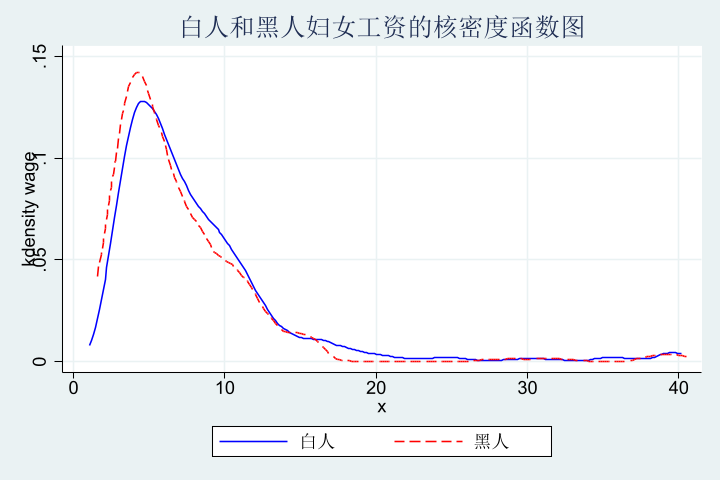

In [30]:
* 在一张图中绘制白人和黑人妇女的工资核密度函数图
twoway (kdensity wage if race==1, lcolor(blue) lpattern(solid) legend(label(1 "白人"))) ///
    (kdensity wage if race==2, lcolor(red) lpattern(dash) legend(label(2 "黑人"))), ///
    legend(order(1 "白人" 2 "黑人")) ///
    title("白人和黑人妇女工资的核密度函数图") ///
    xlabel(, grid) ylabel(, grid)

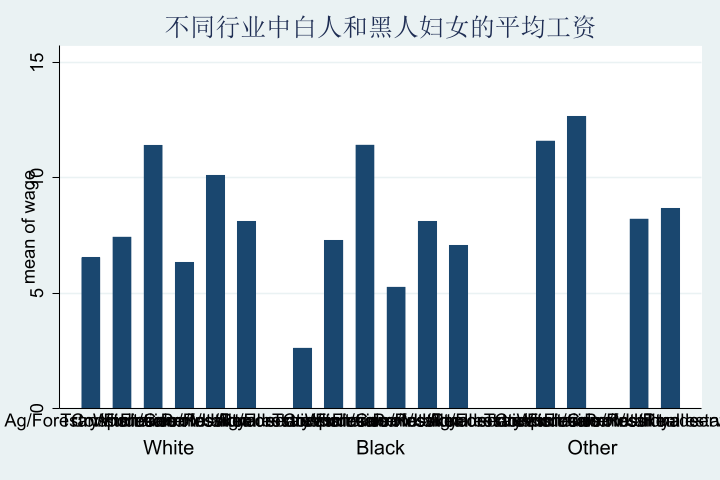

In [32]:
* 用柱状图展示白人和黑人妇女在不同行业的工资分布特征
graph bar (mean) wage, over(industry) over(race) legend(label(1 "白人") label(2 "黑人")) ///
    title("不同行业中白人和黑人妇女的平均工资") ylabel(, grid)

## 8. 基本回归分析。

In [33]:
* 以 industry==1 作为基准组，回归分析各行业的平均工资
regress wage i.industry

* 回归结果中，_cons 为基准组（industry==1）的平均工资，其余系数为与基准组的差异


      Source |       SS           df       MS      Number of obs   =     1,485
-------------+----------------------------------   F(5, 1479)      =     18.04
       Model |  2994.71627         5  598.943254   Prob > F        =    0.0000
    Residual |  49110.7164     1,479  33.2053525   R-squared       =    0.0575
-------------+----------------------------------   Adj R-squared   =    0.0543
       Total |  52105.4327     1,484  35.1114775   Root MSE        =    5.7624

------------------------------------------------------------------------------
        wage | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
    industry |
Construct~n  |   1.943813    1.76019     1.10   0.270    -1.508922    5.396547
Transport~y  |   5.822232   1.523878     3.82   0.000     2.833039    8.811424
Wholesale..  |   .5047755    1.43282     0.35   0.725    -2.305799     3.31535
Finance/I..  |   4.222053    1.4581


Adjusted predictions                                     Number of obs = 1,485
Model VCE: OLS

Expression: Linear prediction, predict()

------------------------------------------------------------------------------
             |            Delta-method
             |     Margin   std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
    industry |
Ag/Forest~s  |   5.621121   1.397589     4.02   0.000     2.879653    8.362589
Construct~n  |   7.564934   1.070052     7.07   0.000     5.465952    9.663916
Transport~y  |   11.44335   .6074112    18.84   0.000     10.25187    12.63483
Wholesale..  |   6.125897    .315778    19.40   0.000     5.506476    6.745317
Finance/I..  |   9.843174    .415866    23.67   0.000     9.027424    10.65892
Professio..  |   7.871186    .200743    39.21   0.000     7.477415    8.264957
------------------------------------------------------------------------------

Variables that un

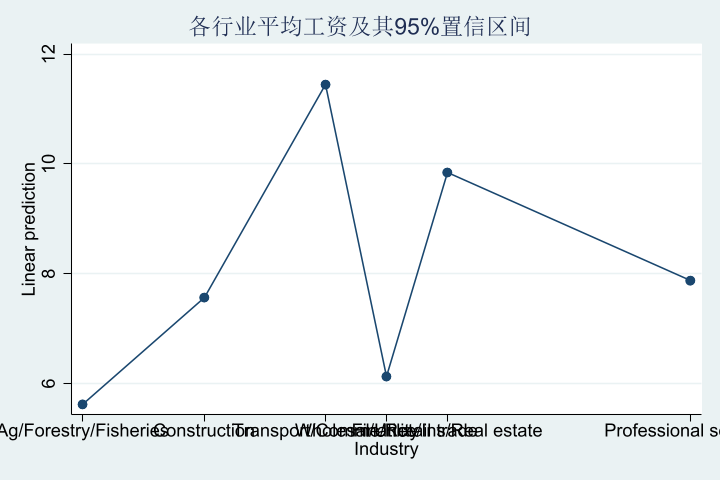

In [34]:
* 使用 margins 命令计算各行业的平均工资及其置信区间
margins industry

* 使用 marginsplot 命令绘制估计值及其置信区间
marginsplot, noci title("各行业平均工资及其95%置信区间")

In [ ]:
* 之前写的代码报错，所以删掉了，但是变量已经定义了，不能重复定义，所以把它们注释化
* gen ln_wage = ln(wage)l
* gen ln_hours = ln(hours)
* gen Black_ln_hours = Black * ln_hours
* 回归模型，包含行业和职业固定效应，以及控制变量
regress ln_wage ln_hours Black Black_ln_hours age age2 i.race ttl_exp i.industry i.occupation

* 解释：
* β1（ln_hours 的系数）表示在控制了其他变量后，非黑人妇女工作时长每增加1%的工资弹性。
* β3（Black × ln_hours 的系数）表示黑人妇女工作时长对工资弹性的额外影响，即黑人与非黑人在工作时长对工资影响上的差异。

note: 2.race omitted because of collinearity.

      Source |       SS           df       MS      Number of obs   =     1,480
-------------+----------------------------------   F(22, 1457)     =     34.16
       Model |  167.470939        22   7.6123154   Prob > F        =    0.0000
    Residual |  324.727678     1,457  .222874178   R-squared       =    0.3403
-------------+----------------------------------   Adj R-squared   =    0.3303
       Total |  492.198617     1,479  .332791492   Root MSE        =     .4721

------------------------------------------------------------------------------
     ln_wage | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
    ln_hours |   .0305391   .0287869     1.06   0.289     -.025929    .0870073
       Black |  -.4539838   .3476089    -1.31   0.192    -1.135851    .2278836
Black_ln_h~s |   .1029429   .0962363     1.07   0.285    -.0858335    .2917194
    

  -.2581559   .1881686    -1.37   0.170    -.6272661    .1109543
      Other  |  -.1055372   .0471218    -2.24   0.025     -.197971   -.0131034
             |
       _cons |  -.1009251   2.147175    -0.05   0.963    -4.312809    4.110959
------------------------------------------------------------------------------


In [ ]:
* 使用 areg 估计模型，areg 只能吸收一个固定效应，这里选择industry
areg ln_wage ln_hours Black Black_ln_hours age age2 i.race ttl_exp i.occupation, absorb(industry)

note: 2.race omitted because of collinearity.



Linear regression, absorbing indicators             Number of obs     =  1,480
Absorbed variable: industry                         No. of categories =      6
                                                    F(17, 1457)       =  31.55
                                                    Prob > F          = 0.0000
                                                    R-squared         = 0.3403
                                                    Adj R-squared     = 0.3303
                                                    Root MSE          = 0.4721

------------------------------------------------------------------------------
     ln_wage | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
    ln_hours |   .0305391   .0287869     1.06   0.289     -.025929    .0870073
       Black |  -.4539838   .3476089    -1.31   0.192    -1.135851    .2278836
Black_ln_h~s |   .1029429   .0962363     1.07   0.

In [50]:
* 使用 reghdfe 估计模型，吸收行业和职业双重固定效应
reghdfe ln_wage ln_hours Black Black_ln_hours age age2 i.race ttl_exp, absorb(industry occupation)

(dropped 1 singleton observations)
(MWFE estimator converged in 7 iterations)
note: 1b.race omitted because of collinearity

HDFE Linear regression                            Number of obs   =      1,479
Absorbing 2 HDFE groups                           F(   7,   1457) =      17.34
                                                  Prob > F        =     0.0000
                                                  R-squared       =     0.3402
                                                  Adj R-squared   =     0.3307
                                                  Within R-sq.    =     0.0769
                                                  Root MSE        =     0.4721

------------------------------------------------------------------------------
     ln_wage | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
    ln_hours |   .0305391   .0287869     1.06   0.289     -.025929    .0870073
     